# Handwritten Digit Classifiation

## Importing Libraries and Datasets

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np

#### Here we have used MNIST dataset for the classifications
it has set of 70000 images with 784 features

In [2]:
MNIST=fetch_openml('MNIST_784')

### initialising the variables for data and targets

In [3]:
X , Y =MNIST['data'],MNIST['target']

In [4]:
X.shape

(70000, 784)

### Shape Visualisation

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
some_digit=X[3600]

### Converting the resolution into 28x28 to display the image.

In [7]:
some_digit_image=some_digit.reshape(28,28)

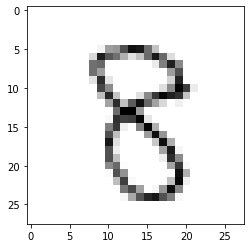

In [8]:
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation='nearest')

(0.0, 1.0, 0.0, 1.0)

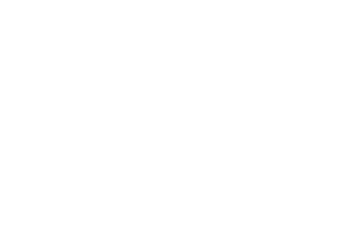

In [9]:
plt.axis('off')

In [10]:
Y[3600]

'8'

### Separating the training and testing data

In [11]:
X_train , X_test =X[:6000] , X[6000:]

In [12]:
Y_train , Y_test =Y[:6000], Y[6000:]

### Shuffling the datasets 

In [13]:
shuffle_index=np.random.permutation(6000)

In [14]:
X_train , Y_train =X_train[shuffle_index],Y_train[shuffle_index]

### Converting string into integers

In [15]:
Y_train=Y_train.astype(np.int8)

In [16]:
Y_test=Y_test.astype(np.int8)

In [17]:
Y_train_2=(Y_train==2)

In [18]:
Y_train_2

array([False, False, False, ..., False, False, False])

In [19]:
Y_test_2=(Y_test==2)

In [20]:
Y_test_2

array([False, False, False, ..., False, False, False])

## Model building 

In [21]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(tol=0.1)
clf.fit(X_train,Y_train_2)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(tol=0.1)

In [22]:
clf.predict([some_digit])

array([False])

## Cross Validation 

In [29]:
from sklearn.model_selection import cross_val_score
a=cross_val_score(clf,X_train,Y_train_2,cv=3,scoring='accuracy')

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [30]:
a.mean()

0.9571666666666667

### Mean =0.9571666  So output having 95.71% accuracy